In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

In [3]:
chi_testing = pd.read_csv('https://data.cityofchicago.org/resource/t4hh-4ku9.csv')
chi_deaths = pd.read_csv('https://data.cityofchicago.org/resource/naz8-j4nc.csv')

In [4]:
positively =chi_testing[['date','day','people_tested_total','people_positive_total','people_not_positive_total']].copy()
positively['Positively Rate'] = (positively['people_positive_total'] / positively['people_tested_total']) * 100
positively.sort_values(by='date', ascending=True, inplace=True)
positively.reset_index(inplace=True)
positively.drop([0,1,2,3],inplace=True) #early data points are dropped becasue of low data (ex: 27 people tested with 0 positive)

In [5]:
#Drop the one null data point with no date
er = positively[positively['date'].isnull()].index[0]
positively.drop([er],inplace=True) #change the number to the NaN row below
positively['date'].isnull().values.any()

False

In [6]:
# Remove the year from the date column for the x axis label
positively['date'] = pd.to_datetime(positively['date'])
positively.set_index('date',inplace=True)
positively.tail(20)

,index,day,people_tested_total,people_positive_total,people_not_positive_total,Positively Rate
date,,,,,,
2021-03-07,19,Sunday,1269,174,1095,13.711584
2021-03-08,18,Monday,3026,323,2703,10.674157
2021-03-09,17,Tuesday,2953,324,2629,10.971893
2021-03-10,16,Wednesday,2827,327,2500,11.567032
2021-03-11,15,Thursday,2794,343,2451,12.276306
2021-03-12,14,Friday,2980,346,2634,11.610738
2021-03-13,13,Saturday,2314,249,2065,10.760588
2021-03-14,12,Sunday,1444,180,1264,12.465374
2021-03-15,11,Monday,3138,362,2776,11.536010


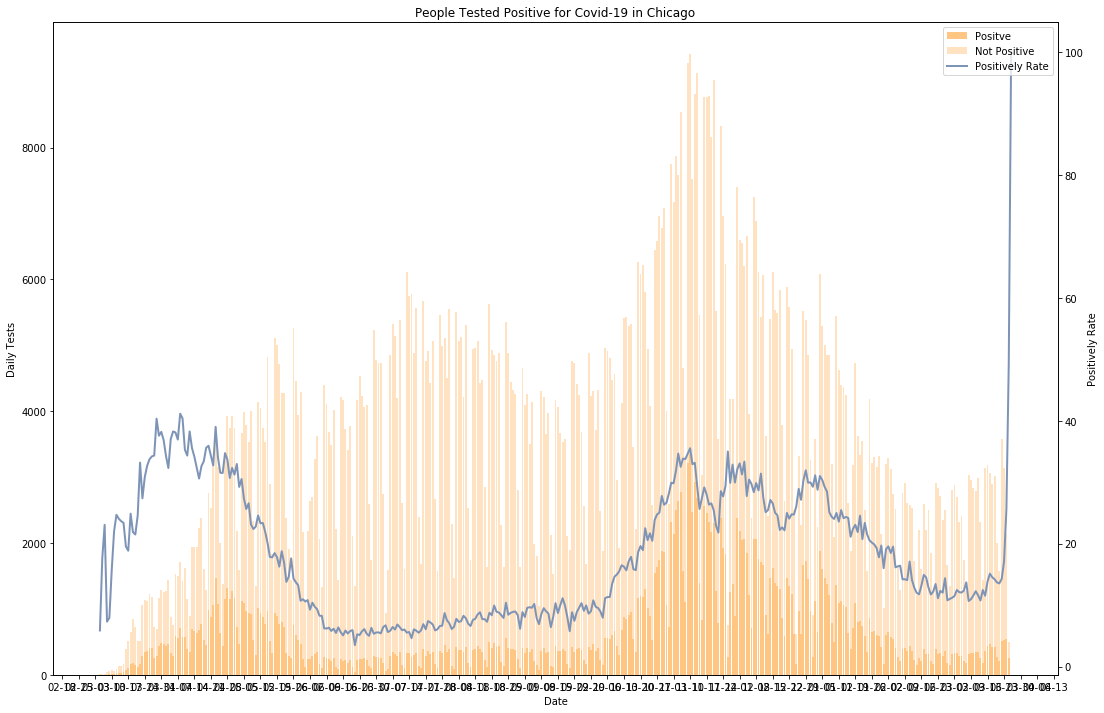

In [14]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(positively.index, positively['people_positive_total'], color='#ffc583', label='Positve')
ax.bar(positively.index, positively['people_not_positive_total'], color='#ffe2c1', bottom=positively['people_positive_total'], label='Not Positive')

axes2 = plt.twinx()
axes2.plot(positively.index, positively['Positively Rate'], color='#7e94b7', label='Positively Rate', linewidth=2)

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Daily Tests')
axes2.set_ylabel('Positively Rate')
ax.set_title('People Tested Positive for Covid-19 in Chicago')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

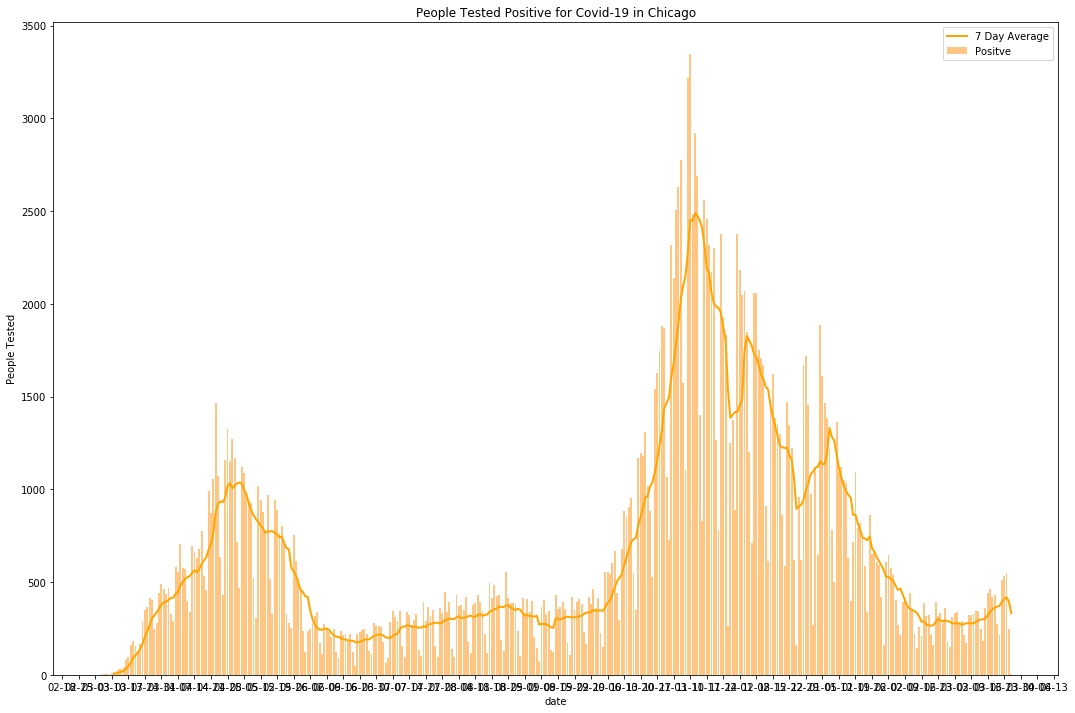

In [8]:
positively['7 Day Average'] = positively['people_positive_total'].rolling(window=7).mean()
positively['7 Day Testing'] = positively['people_tested_total'].rolling(window=7).mean()
positively['7 Day Positively Rate'] = (positively['7 Day Average'] / positively['7 Day Testing']) * 100

positively['14 Day Average'] = positively['people_positive_total'].rolling(window=14).mean()
positively['14 Day Testing'] = positively['people_tested_total'].rolling(window=14).mean()
positively['14 Day Positively Rate'] = (positively['14 Day Average'] / positively['14 Day Testing']) * 100

fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(positively.index, positively['people_positive_total'], label='Positve', color='#ffc583')

ax.plot(positively.index, positively['7 Day Average'], linewidth=2, color='orange')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('date')
ax.set_ylabel('People Tested')
ax.set_title('People Tested Positive for Covid-19 in Chicago')
ax.legend()
plt.show()

In [9]:
deaths = chi_deaths[['lab_report_date','deaths_total']].copy()
deaths.rename(columns={'lab_report_date':'date'},inplace=True)
Overall_death = deaths['deaths_total'].sum()
deaths['date'] = pd.to_datetime(deaths['date'])
er = deaths[deaths['date'].isnull()].index[0]
deaths.drop(deaths.index[er],inplace=True)
deaths.sort_values(by='date', ascending=True, inplace=True)
deaths.reset_index(inplace=True)
deaths.set_index('date',inplace=True)
deaths['Seven_Day_Death_Average'] = deaths['deaths_total'].rolling(window=7).mean()
print(Overall_death)
deaths.tail(20)

5106


,index,deaths_total,Seven_Day_Death_Average
date,,,
2021-03-07,19,3,4.285714
2021-03-08,18,4,4.571429
2021-03-09,17,4,4.142857
2021-03-10,16,8,4.714286
2021-03-11,15,1,3.857143
2021-03-12,14,7,4.142857
2021-03-13,13,2,4.142857
2021-03-14,12,3,4.142857
2021-03-15,11,3,4.000000


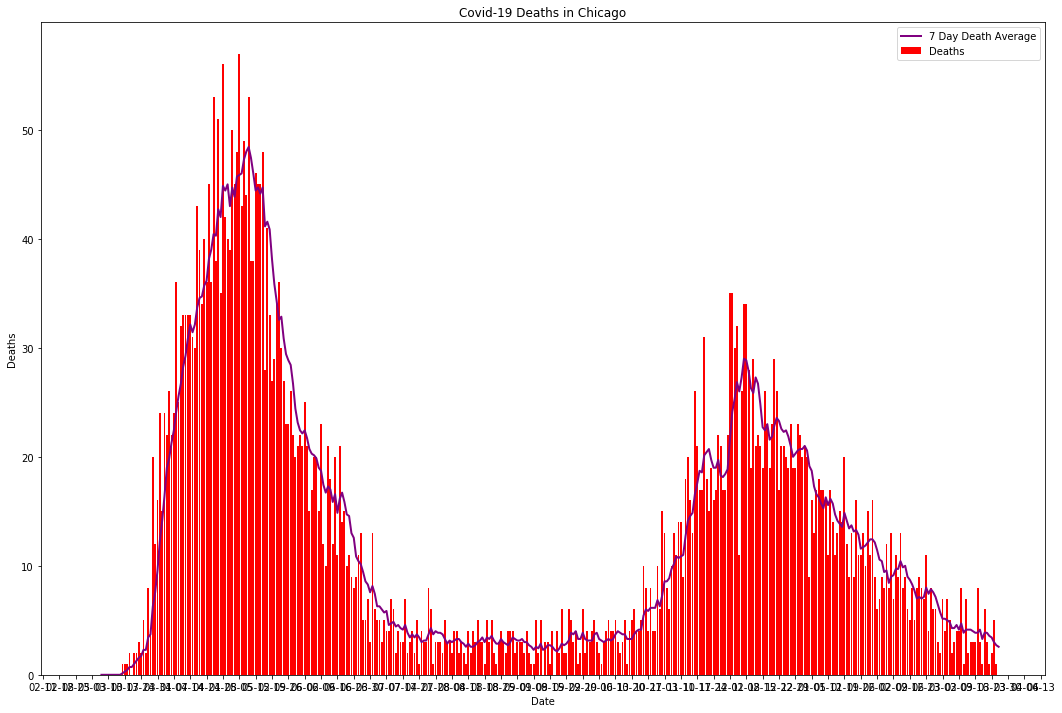

In [10]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(deaths.index, deaths['deaths_total'], label='Deaths', color='red')

ax.plot(deaths.index, deaths['Seven_Day_Death_Average'], linewidth=2, color='purple', label='7 Day Death Average')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
ax.set_title('Covid-19 Deaths in Chicago')
ax.legend()
plt.show()

In [11]:
positively.tail(21)

,index,day,people_tested_total,people_positive_total,people_not_positive_total,Positively Rate,7 Day Average,7 Day Testing,7 Day Positively Rate,14 Day Average,14 Day Testing,14 Day Positively Rate
date,,,,,,,,,,,,
2021-03-06,20,Saturday,1744,216,1528,12.385321,274.000000,2316.142857,11.830013,281.285714,2319.357143,12.127745
2021-03-07,19,Sunday,1269,174,1095,13.711584,277.714286,2305.428571,12.046102,282.428571,2317.571429,12.186402
2021-03-08,18,Monday,3026,323,2703,10.674157,279.000000,2337.142857,11.937653,277.500000,2325.357143,11.933651
2021-03-09,17,Tuesday,2953,324,2629,10.971893,278.000000,2347.142857,11.844187,278.142857,2334.214286,11.915909
2021-03-10,16,Wednesday,2827,327,2500,11.567032,276.571429,2364.571429,11.696472,277.571429,2341.928571,11.852259
2021-03-11,15,Thursday,2794,343,2451,12.276306,285.428571,2432.571429,11.733615,281.928571,2374.071429,11.875320
2021-03-12,14,Friday,2980,346,2634,11.610738,293.285714,2513.285714,11.669414,281.000000,2408.642857,11.666321
2021-03-13,13,Saturday,2314,249,2065,10.760588,298.000000,2594.714286,11.484887,286.000000,2455.428571,11.647661
2021-03-14,12,Sunday,1444,180,1264,12.465374,298.857143,2619.714286,11.408005,288.285714,2462.571429,11.706695


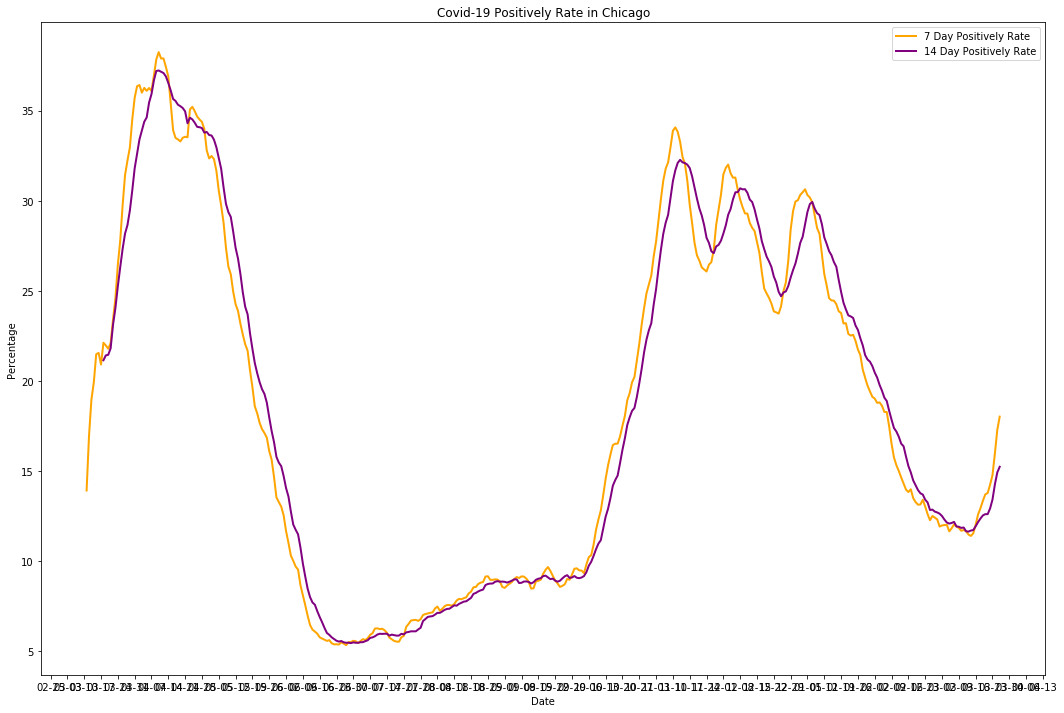

In [12]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.plot(positively.index, positively['7 Day Positively Rate'], linewidth=2, color='orange', label='7 Day Positively Rate')
ax.plot(positively.index, positively['14 Day Positively Rate'], linewidth=2, color='purple', label='14 Day Positively Rate')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Covid-19 Positively Rate in Chicago')
ax.legend()
plt.show()